<a href="https://colab.research.google.com/github/CodeLikeAGirl18/Data-Science-2021/blob/main/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1:

If you haven't already done so, the first task is to form a group of 2-4 people. There is an announcement on Absalon describing how to do this. Make sure that you list the names of all members of the group at the top of the jupyter notebook along with your group number.


Group 16:

Julie Mann Kjeldsen, ngj903

Asger ..

# Task 2

For our fake news predictor, we will be using the FakeNewsCorpus dataset as our primary dataset. It is available from this github repository: https://github.com/several27/FakeNewsCorpus, where you can also find information about how the data is collected, the available fields, etc. In this first milestone, we will work only on a small subset of the FakeNewsCorpus dataset. Your first task is to retrieve this subset from https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv and structure/process/clean it. Describe which procedures (and which libraries) you used and why they are appropriate.

In [4]:
pip install clean-text[gpl]

     |████████████████████████████████| 133kB 4.4MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 245kB 6.4MB/s 
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=84704933da52308f6d0abfcaf97b57d3e9f52c5a651222571a217f839cb250fd
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
Successfully built ftfy


In [5]:
# Import packages and dependencies
from urllib.request import urlretrieve #for csv url import
import os
import pandas as pd
import numpy as np
import math
import requests
from bs4 import BeautifulSoup as bs4
import re
from cleantext import clean
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import porter
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Retrieve subset:

In [5]:
# assign url of file
url_news_sample = "https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv"


In [6]:
# save file locally
urlretrieve(url_news_sample, ("/content/news_sample.csv"))

('/content/news_sample.csv', <http.client.HTTPMessage at 0x7f32ee3868d0>)

In [7]:
# read file into DataFrame and print its head
data_df = pd.read_csv("/content/news_sample.csv")

In [8]:
# display the table
data_df.head()


,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


structure/process/clean data


In [9]:
# function for handling lowercase, urls, numbers, mails replaced, newlines
def fast_clean(text):
    return clean(text, lower=True, no_urls=True, no_numbers=True,
                no_emails=True, no_line_breaks=True,
                replace_with_url="<URL>",
                replace_with_email="<EMAIL>",
                replace_with_number="<NUM>")

#Dates? whitespace? Year nums replaced with NUM,

In [59]:
# clean content, titles, author and type(necessary?) colums
# turn colums into strings or lists.

# method for cleaning content in data 
def clean_content():
    cleaned_data = []
    for i in data_df["content"]:
      cleaned_data.append(fast_clean(i))
    string_of_contents = ",".join([content for content in cleaned_data])
    return string_of_contents

# method for cleaning titles in data 
def clean_titles():
    cleaned_data = []
    for i in data_df["title"]:
      cleaned_data.append(fast_clean(i))
    string_of_titles = ",".join([title for title in cleaned_data])
    return string_of_titles


#Get all domains as list //not clean bco <URL>
def domain_list():
  list_of_domains_data = []
  for i in data_df["domain"]:
    list_of_domains_data.append(i)
  return list_of_domains_data

#Get all types as list
def type_list():
  list_of_types_data = []
  for i in data_df["type"]:
    list_of_types_data.append(fast_clean(i))
  return list_of_types_data

#Get all authors as list
def author_list():
  list_of_authors_data = []
  for i in data_df["authors"]:
    list_of_authors_data.append(i)
  return list_of_authors_data



In [60]:
# strings of cleaned data colums
string_of_contents = clean_content()
string_of_titles = clean_titles()

# lists of cleaned data colums
list_of_domains_data = domain_list()
list_of_types_data = type_list()
list_of_authors_data = author_list() #no clean

# Bodies of text (content, titles)

In [12]:
# Work on bodies of text (content and titles) - tokenize, remove stopwords, gain vocabulary

#Tokenize contents set and get vocabulary
tokens_content = word_tokenize(string_of_contents)
vocab_content = set(tokens_content)
print("The size of content vocabulary is", len(vocab_content))

#Tokenize titles set and get vocabulary
tokens_title = word_tokenize(string_of_titles)
vocab_title = set(tokens_title)
print("The size of title vocabulary is", len(vocab_title))


The size of content vocabulary is 16565
The size of title vocabulary is 1390


In [1]:
#Remove stopwords from content
tokens_content_without_sw = [word for word in tokens_content if not word in stopwords.words('english')]
vocab_content_without_sw = set(tokens_content_without_sw)

#Remove stopwords from titles 
tokens_title_without_sw = [word for word in tokens_title if not word in stopwords.words('english')]
vocab_title_without_sw = set(tokens_title_without_sw)



NameError: ignored

In [14]:
# size of vocas without stopwords
print("The size of content vocabulary without stopwords is", len(vocab_content_without_sw ))
print("The size of title vocabulary without stopwords is", len(vocab_title_without_sw))

The size of content vocabulary without stopwords is 16433
The size of title vocabulary without stopwords is 1299


In [15]:
# reduction rates in content and titel vocab wrt. stop_words
num_of_rmved_vocab_content = len(vocab_content) - len(vocab_content_without_sw)
reduction_rate_content = (len(vocab_content) - len(vocab_content_without_sw))/len(vocab_content)
print("We have remoned %d stopwords." %num_of_rmved_vocab_content, \
      "The reduction rate of the title vocabulary size is %0.3f." %reduction_rate_content)

num_of_rmved_vocab_title = len(vocab_title) - len(vocab_title_without_sw)
reduction_rate_title = (len(vocab_title) - len(vocab_title_without_sw))/len(vocab_title)
print("We have remoned %d stopwords." %num_of_rmved_vocab_title, \
      "The reduction rate of the title vocabulary size is %0.3f." %reduction_rate_title)

We have remoned 132 stopwords. The reduction rate of the title vocabulary size is 0.008.
We have remoned 91 stopwords. The reduction rate of the title vocabulary size is 0.065.


# Domain, type and author distribution

In [61]:
#method to count domain distribution
def domain_distribution(domain_list):
  #Create a dictionary with domains as keys, all with the value 0:
  count_domain = dict.fromkeys(domain_list, 0)
  for i in data_df["domain"]:
          if i in count_domain:
                count_domain[i]+=1
  sorted_dict_domains = dict(sorted(count_domain.items(), key=lambda x: x[1], reverse=True))
  return sorted_dict_domains

#method to count type distribution
def type_distribution(type_list):
  count_type = dict.fromkeys(type_list, 0)
  for i in data_df["type"]:
          if i in count_type:
                count_type[i]+=1
  sorted_dict_types = dict(sorted(count_type.items(), key=lambda x: x[1], reverse=True))
  return sorted_dict_types

#method to count author domain distribution
def author_distribution(author_list):
  count_author = dict.fromkeys(author_list, 0)
  for i in data_df["authors"]:
          if i in count_author:
                count_author[i]+=1
  sorted_dict_authors = dict(sorted(count_author.items(), key=lambda x: x[1], reverse=True))
  return sorted_dict_authors


In [66]:
# domain, type and author dics
sorted_dict_domain_distribution = domain_distribution(list_of_domains_data)
sorted_dict_type_distribution = type_distribution(list_of_types_data)
sorted_dict_author_distribution = author_distribution(list_of_authors_data)



# **Task 3**

Now try to explore the FakeNewsCorpus dataset. Make at least three non-trivial observations/discoveries about the data. These observations could be related to outliers, artefacts, or even better: genuinely interesting patterns in the data that could potentially be used for fake-news detection. Examples of simple observations could be how many missing values there are in particular columns - or what the distribution over domains is. Be creative! :).


Obs could be related to: outliers, artefacts, or even better: genuinely interesting patterns in the data that could potentially be used for fake-news detection


Example simple obs:

distribution over domains

 how many missing values there are in particular columns

# Explore text bodies

In [21]:
# count words in text-body
def count_words(vocabulary, tokens):
    count_word = dict.fromkeys(vocabulary, 0)
    for i in tokens:
            if i in count_word:
                count_word[i]+=1
    sorted_dict = dict(sorted(count_word.items(), key=lambda x: x[1], reverse=True))
    return sorted_dict

In [22]:
#sorted dictionaries - titles, content
sorted_dict_content = count_words(vocab_content_without_sw,tokens_content_without_sw)
sorted_dict_titles = count_words(vocab_title_without_sw,tokens_title_without_sw)

In [24]:
print("top 50 most frequent words are:", list(sorted_dict_content.items())[:50])
print("top 50 most frequent words are:", list(sorted_dict_titles.items())[:50])

top 50 most frequent words are: [(',', 8936), ('.', 7451), ('>', 2637), ('<', 2630), ('num', 2378), ("'s", 1570), ('``', 1187), ("''", 1124), (':', 1084), (')', 713), ('(', 711), ('-', 507), ('?', 492), ('!', 451), ('one', 441), ("n't", 430), ('people', 386), ('trump', 347), ('would', 332), ('like', 328), ('time', 292), ('us', 284), ('also', 276), ('new', 270), ('--', 267), (';', 265), ('blockchain', 260), ('...', 244), ('url', 243), ('said', 229), ('many', 226), ('market', 216), ('could', 214), ('even', 213), ('next', 212), ("'", 208), ('&', 206), ('think', 200), ('government', 200), ('state', 193), ('way', 191), ('president', 188), ('two', 185), ('may', 185), ('see', 183), ('world', 182), ('first', 181), ('life', 177), ('$', 176), ('make', 167)]
top 50 most frequent words are: [(',', 303), ('>', 58), ('num', 58), ('<', 58), (':', 54), ("'s", 28), ('-', 25), ('trump', 24), ("'", 21), (')', 15), ('(', 15), ('?', 13), ('new', 13), ("''", 10), ('``', 9), ('--', 9), ('&', 9), ('president'

In [25]:
# dataframes content and titles dics
pd_freq_content_words = pd.DataFrame()
pd_freq_content_words["content_freq"] = sorted_dict_titles.items()
print(pd_freq_content_words)

pd_freq_title_words = pd.DataFrame()
pd_freq_title_words["Title_freq"] = sorted_dict_content.items()
print(pd_freq_title_words)

           content_freq
0              (,, 303)
1               (>, 58)
2             (num, 58)
3               (<, 58)
4               (:, 54)
...                 ...
1294        (-month, 1)
1295  (conservative, 1)
1296       (aerosol, 1)
1297   (daddy/sugar, 1)
1298          (cold, 1)

[1299 rows x 1 columns]
           Title_freq
0           (,, 8936)
1           (., 7451)
2           (>, 2637)
3           (<, 2630)
4         (num, 2378)
...               ...
16428       (dean, 1)
16429  (re-assess, 1)
16430    (sedelia, 1)
16431      (crest, 1)
16432  (focused.., 1)

[16433 rows x 1 columns]


# Explore domain distribution (entire subdataset)

In [53]:
# Explore domain distribution (entire subdataset)

domain_distribution_df = pd.DataFrame(list(sorted_dict_domain_distribution.items()))
print(domain_distribution_df)

                            0    1
0           beforeitsnews.com  155
1         canadafreepress.com   24
2      washingtonexaminer.com   17
3             www.newsmax.com    7
4            awarenessact.com    6
5             naturalnews.com    5
6    willyloman.wordpress.com    4
7       strategic-culture.org    4
8           christianpost.com    3
9                     awm.com    2
10               alternet.org    2
11      undergroundhealth.com    2
12                  vdare.com    2
13           city-journal.org    2
14                cnnnext.com    1
15       bipartisanreport.com    1
16      blackagendareport.com    1
17           charismanews.com    1
18         barenakedislam.com    1
19             breakpoint.org    1
20  collectivelyconscious.net    1
21         nationalreview.com    1
22                    unz.com    1
23        21stcenturywire.com    1
24        washingtonsblog.com    1
25        americanlookout.com    1
26                 anonhq.com    1
27              brei

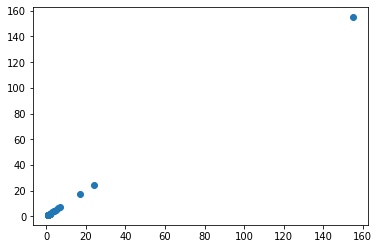

In [36]:
#Uneven distribution of domains in subdataset. Represented as scatter plot:
x=sorted_dict_domain_distribution.values()
plt.scatter(x,x)

In above scatter plt we see one outlier. In this case a domain which appears in the dataset with a news story much more often than other domains. From here we will explore information about the outlier:

In [44]:
domain_type_data = data_df.take([2,3], axis=1)

In [45]:
#Outlier processing (beforeitsnews.com)

#outlier indices in dataset
list_of_outlier_domain_indices = []
for i in range(len(list_of_domains_data)):
  if list_of_domains_data[i] == "beforeitsnews.com":
    list_of_outlier_domain_indices.append(i)

In [46]:
#Extract rows from domain/type dataset about outlier 
outlier_domain_type_data = domain_type_data.take(list_of_outlier_domain_indices, axis=0)
print('take rows from domain/type dataset =>\n', outlier_domain_type_data)

take rows from domain/type dataset =>
                 domain  type
1    beforeitsnews.com  fake
7    beforeitsnews.com  fake
8    beforeitsnews.com  fake
10   beforeitsnews.com  fake
13   beforeitsnews.com  fake
..                 ...   ...
236  beforeitsnews.com  fake
239  beforeitsnews.com  fake
243  beforeitsnews.com  fake
245  beforeitsnews.com  fake
246  beforeitsnews.com  fake

[155 rows x 2 columns]


In [47]:
#Create a dictionary with types as keys, all initially with value 0:
def outlier_type_distribution(type_list):
  count_type = dict.fromkeys(type_list, 0)
  for i in outlier_domain_type_data["type"]:
          if i in count_type:
                count_type[i]+=1
  sorted_dict_types = dict(sorted(count_type.items(), key=lambda x: x[1], reverse=True))
  return sorted_dict_types


In [48]:
#Get outlier types as list
def outlier_type_list():
  list_of_types_outlier = []
  for i in outlier_domain_type_data["type"]:
    list_of_types_outlier.append(fast_clean(i))
  return list_of_types_outlier

In [49]:
list_of_types_outlier = outlier_type_list()
outlier_type_distribution(list_of_types_outlier)
#all 155 "fake" news from one source, and outlier only labeled with fake news

{'fake': 155}

# Explore type distribution (entire subdataset)

In [54]:
# Explore type distribution (entire subdataset)
domain_distribution_df = pd.DataFrame(list(sorted_dict_type_distribution.items()))
print(domain_distribution_df)
#12 missing values in type column, all 155 fake's from one source



             0    1
0         fake  155
1   conspiracy   31
2    political   23
3   unreliable    6
4         bias    6
5      junksci    6
6      unknown    6
7     reliable    3
8    clickbait    1
9         hate    1
10         nan    0


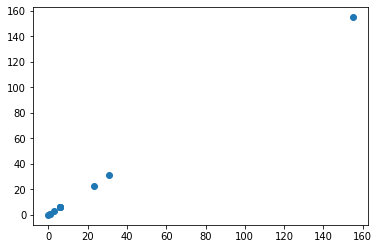

In [43]:
x=sorted_dict_type_distribution.values()
plt.scatter(x,x)

(array([108.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <a list of 10 Patch objects>)

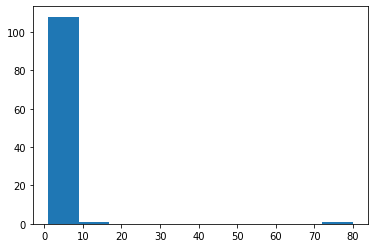

In [257]:
plt.hist(x)

# Explore author distribution (entire subdataset)

In [67]:
# Explore type distribution (entire subdataset)
author_distribution_df = pd.DataFrame(list(sorted_dict_author_distribution.items()))
print(author_distribution_df)
#80 missing values (out of 250)

                     0   1
0                  NaN  80
1           John Rolls  10
2      Gerald Sinclair   6
3        Morgan Linton   6
4    The Daily Sheeple   6
..                 ...  ..
105       Mark Swanson   1
106    Susan Ferrechio   1
107          Dimitry K   1
108        Todd Beamon   1
109      Bill Hoffmann   1

[110 rows x 2 columns]


In [68]:
sum(author_distribution_df[1])

250

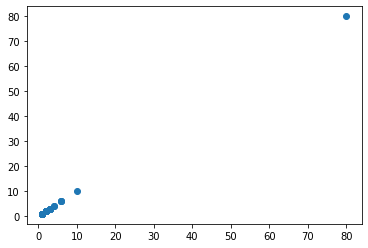

In [69]:
x=sorted_dict_author_distribution.values()
plt.scatter(x,x)
#outlier among authors is nan

In [70]:
#Relation between author and type

#Extract author and type cols from data
author_type_data = data_df.take([3, 10], axis=1)
print('take cols from data dataset =>\n', author_type_data)

take cols from data dataset =>
            type          authors
0    unreliable      Ruth Harris
1          fake     Zurich Times
2    unreliable              NaN
3    unreliable  Alexander Smith
4     clickbait  Gloria Christie
..          ...              ...
245        fake              NaN
246        fake        Dimitry K
247         NaN      Todd Beamon
248         NaN    Bill Hoffmann
249         NaN              NaN

[250 rows x 2 columns]


In [71]:
#Extract rows from author/type dataset - Q: relation between fake and authos as nan

#"fake" indices in dataset
list_of_fake_indices_data = []
for i in range(len(list_of_types_data)):
  if list_of_types_data[i] == "fake":
    list_of_fake_indices_data.append(i)

author_fake_data = author_type_data.take(list_of_fake_indices_data, axis=0)
print('take rows from domain/type dataset =>\n', author_fake_data)

take rows from domain/type dataset =>
      type                  authors
1    fake             Zurich Times
7    fake                      NaN
8    fake                      NaN
10   fake               John Rolls
13   fake  Cna Daily News - Europe
..    ...                      ...
236  fake              Marler Blog
239  fake                      NaN
243  fake                      NaN
245  fake                      NaN
246  fake                Dimitry K

[155 rows x 2 columns]


In [72]:
#Fake author list
def fake_author_list():
  list_of_fake_authors = []
  for i in author_fake_data["authors"]:
      list_of_fake_authors.append(i)
  return list_of_fake_authors

In [73]:
list_of_fake_authors = fake_author_list()
print(list_of_fake_authors)

['Zurich Times', nan, nan, 'John Rolls', 'Cna Daily News - Europe', 'Baroness Photos', 'Universe Today', nan, 'John Rolls', 'Lisa Haven', 'Freedom Bunker', nan, 'John Rolls', 'Lisa Haven', 'Morgan Linton', 'John Rolls', 'Freedom Bunker', 'Lisa Haven', 'Freedom Bunker', 'John Rolls', nan, 'Pawan Kadu', nan, 'John Rolls', nan, nan, nan, 'John Rolls', 'John Rolls', 'John Rolls', nan, nan, 'Lisa Haven', 'John Rolls', nan, 'Michael Johnston', 'Alton Parrish', 'Alton Parrish', nan, nan, 'Downsize Dc', 'Alton Parrish', nan, 'Universe Today', 'Downsize Dc', 'Morgan Linton', 'Morgan Linton', 'Morgan Linton', 'Morgan Linton', 'Morgan Linton', 'Judicial Watch', 'Wake Up World', nan, 'Wake Up World', 'Cop Block', 'B Mans Revolt', 'Due Diligence', nan, 'Alpha Sources', 'Due Diligence', 'B Mans Revolt', 'Dpsp, Truth Endures Forever', 'The Vatic Project', nan, nan, nan, 'Jeffery Pritchett', nan, 'Ufo Iconoclast', 'Ufo Iconoclast', 'Earth Heal', 'Norml Foundation', 'Norml Foundation', 'Henry Makow', '

In [74]:
def fake_author_distribution(fake_author_list):
  count_fake_author = dict.fromkeys(fake_author_list, 0)
  for i in author_fake_data["authors"]:
      if i in count_fake_author:
                count_fake_author[i]+=1
  sorted_dict_fake_authors = dict(sorted(count_fake_author.items(), key=lambda x: x[1], reverse=True))
  return sorted_dict_fake_authors


In [75]:
sorted_dict_fake_author_distribution = fake_author_distribution(list_of_fake_authors)

In [77]:
fake_author_distribution_df = pd.DataFrame(list(sorted_dict_fake_author_distribution.items()))
print(fake_author_distribution_df)
#out of approx 80 fake articles 51 are anonymous

                                   0   1
0                                NaN  51
1                         John Rolls  10
2                      Morgan Linton   6
3                  The Daily Sheeple   6
4                         Lisa Haven   4
5                        Marler Blog   4
6                     Freedom Bunker   3
7                      Alton Parrish   3
8                     Shahzaib Elahi   3
9                      Psychic Focus   3
10     Caroline'S Breast Cancer Blog   3
11                    Universe Today   2
12                       Downsize Dc   2
13                     Wake Up World   2
14                     B Mans Revolt   2
15                     Due Diligence   2
16                    Ufo Iconoclast   2
17                        Earth Heal   2
18                  Norml Foundation   2
19                   Mercedes Kirkel   2
20                A Bad Witch'S Blog   2
21                      James Rathey   2
22                  The Conglomerate   2
23              

# **Task 4**


In this task you should create your very own news data set by scraping it from the web. We will be looking at the "Politics and Conflict" section of the Wikinews site (https://en.wikinews.org/wiki/Category:Politics_and_conflicts), which contains news articles sorted by the first letter in their title. Since we want the different groups to have slightly different experiences with this data, each group should try to extract the articles for a specific range of letters - given by the python expression:



"ABCDEFGHIJKLMNOPRSTUVWZABCDEFGHIJKLMNOPRSTUVWZ"[group_nr%23:group_nr%23+10]



where group_nr is your group number (according to Task 1). The data set you produce should contain fields corresponding to the content of the article, in addition to some metadata fields like the date when the article was written. Describe the tools you used, and any challenges that you faced, and report some basic statistics on the data (e.g. number of rows, fields, etc). Note that there are no fake/no-fake labels in this dataset - we will consider it as a trusted source of only true articles. Assess whether this is a reasonable choice.

In [1]:
# Extract the articles for a specific range of letters - 
# Calculate group 16 range:
"ABCDEFGHIJKLMNOPRSTUVWZABCDEFGHIJKLMNOPRSTUVWZ"[16%23:16%23+10]


'RSTUVWZABC'

Create dataset


In [8]:
#Get website as text
response = requests.get('https://en.wikinews.org/wiki/Category:Politics_and_conflicts')
contents = response.text
#print(contents)

In [2]:
#Parse website contents
soup = bs4(contents, 'html.parser')
"""

works:
article_container_2 = soup.find_all('div', class_="mw-category-group")
for article in article_container_2:
  z = re.match("[A-CR-Z]",article.find('h3').get_text())
  if z:
      #print(article.get_text()) 
      a = article.find_all('a')
      for tag in a:
          print(tag.get('href'))



article_container_3 = soup.find(id="mw-pages")
#article_sub_container_3 = article_container_3.find_all('div', class_="mw-content-ltr")
article_sub_container_3 = article_container_3.find_all('h2') #, class_="mw-category-group"
result = article_sub_container_3[0]
print(result)
"""
#Get all links for articles of all letters
list_of_links = []
article_container_4 = soup.find('table', class_='toccolours plainlinks')
#print(article_container_4.prettify())
links = article_container_4.find_all('a')
for link in links:
  z = re.match("[RSTUVWZABC?](?!op)", link.get_text()) 
  if z:
    list_of_links.append(link.get('href'))
    #print(link.get('href'))
#print(list_of_links[0])

#Get A articles
A_response = requests.get(list_of_links[0])
A_contents = A_response.text
#print(A_contents)

A_soup = bs4(A_contents, 'html.parser')
A_container = A_soup.find('div', id="mw-pages")
#print(A_container)
A_articles = A_container.find_all('a')
for article in A_articles:
        print(article.get('href'))
##to links før og efter der ikke burde være der


"""
for article in article_sub_container_3:
  z = re.match("[A]",article.find('h3').get_text())
  if z:
      a = article.find_all('a')
      for tag in a:
          print(tag.get('href'))
"""


NameError: ignored

In [130]:
import requests
page = requests.get("https://en.wikipedia.org/wiki/Main_Page")
page
page.status_code
page.content

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

page = requests.get("https://en.wikipedia.org/wiki/Main_Page")
soup = BeautifulSoup(page.content, 'html.parser')
object = soup.find(id="mp-left")
items = object.find_all(class_="mp-h2")
result = items[0]
print(result.prettify())

<h2 class="mp-h2" id="mp-tfa-h2">
 <span id="From_today.27s_featured_article">
 </span>
 <span class="mw-headline" id="From_today's_featured_article">
  From today's featured article
 </span>
</h2>



In [19]:
#h3_class = article_container.find(class_="mw-category-group")

records = []  
for article in article_container:  
    a_ = article.find('div', attrs={'class':'mw-category-group'}).text # result not results
    #price = result.find('div', attrs={'class':'price'}).text[13:-11]
    records.append((a_,))

print(records)

[('2\n►  2005 Political crisis in Brazil\u200e (10\xa0articles)\n►  2006 Israel-Lebanon conflict\u200e (57\xa0articles)\n►  2006 Thailand coup\u200e (5\xa0articles)\n►  2007 Ontario provincial election\u200e (60\xa0articles)\n►  2008 Taiwan Presidential Election\u200e (3\xa0articles)\n►  2011 England riots\u200e (4\xa0articles)\n►  2014 Gaza War\u200e (10\xa0articles)\n►  2014 Libyan conflict\u200e (6\xa0articles)\n►  2019 Hong Kong protests\u200e (6\xa0articles)',), ('"\n"Avast ye scurvy file sharers!": Interview with Swedish Pirate Party leader Rickard Falkvinge\n"Bigoted woman": controversial Gordon Brown remarks caught on air\n"Civil defence" thwarts Israeli air strike on Gaza refugee camp\n"Corrupt" New Zealand government to repay $768,000\n"Darfur a powder keg" says UN Head of Humanitarian Affairs\n"Jihad" Jack Thomas acquitted of terrorism conviction\n"Osama to Obama": Bin Laden addresses US President\n"Teddy bear teacher" returns to England\n"Ten Commandments" judge loses Alaba